# Student Performance Indicator

### LifeCycle of Machine Learning Project
- Understanding The Problem Statements
- Data collecetion
- Data Checks to perform
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Choose Best Model

# 1) Problem Statement
- This Project Understand how the students performance test scores is affected by other variables, such as gender, ethnicity, parental level of Education, Lunch and test preparation Course.

# 2) Data Collection
- DataSet Source - Kaggle.com
- These Dataset consist of 8 columns and 1000 rows

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('D:/END TO END ML PROJECTS/ML Project/notebook/data/stud.csv')


In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

## 1. Data Check to Perform
- Check Missing Values
- Check Duplicates
- Check Data Types
- Check the number of unique values of each column
- check statistics of dataset
- Check the Various Categories present in the different categorical column

## 1.1 Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no Missing Values in the dataset

## 1.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

There is no Duplicates values present in the dataset

### 1.3 Check Data Types

In [7]:
# Check null Data   Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 1.4 Check the number of Unique Values of Each Column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 1.5 Check Statistics of Dataset

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights
- From above description of numerical data,all means are very close to each other- between 66 and 68.05
- All standard deviation are also close - between 14.6 and 15.19
- WHile the minimum score is 0 for maths , for wrting the minimum score is hogher = 10 and for readning minimum score is 10

### 3.7 Exploring Data

In [10]:
print("Categories in 'Gender' variable:  ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethenicity' variable:  ",end=" " )
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable:  ",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:  ",end=" " )
print(df['lunch'].unique())

print("Categories in ''test preparation course':  ",end=" " )
print(df['test_preparation_course'].unique())



Categories in 'Gender' variable:   ['female' 'male']
Categories in 'race/ethenicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in ''test preparation course':   ['none' 'completed']


In [11]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [12]:
# Define numerical and Categorical colums
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('we have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print('we have {} Categorical features: {}'.format(len(categorical_features),categorical_features))

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
we have 5 Categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 1.8 Adding columns for "Total_Score" and "Average_Score"

In [13]:
df['total_score'] =df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = df[df['reading_score'] == 100 ]['average'].count()
writing_full = df[df['writing_score'] == 100 ]['average'].count()
math_full = df[df['math_score'] == 100 ]['average'].count()

print(f'No of Students with full marks in math is : {math_full}')
print(f'No of Students with full marks in math is : {reading_full}')
print(f'No of Students with full marks in math is : {writing_full}')

No of Students with full marks in math is : 7
No of Students with full marks in math is : 17
No of Students with full marks in math is : 14


In [16]:
reading_full = df[df['reading_score'] <= 20 ]['average'].count()
writing_full = df[df['writing_score'] <= 20 ]['average'].count()
math_full = df[df['math_score'] <= 20 ]['average'].count()

print(f'No of Students with less than 20 marks in math is : {math_full}')
print(f'No of Students with less full 20 marks in math is : {reading_full}')
print(f'No of Students with less full 20 marks in math is : {writing_full}')

No of Students with less than 20 marks in math is : 4
No of Students with less full 20 marks in math is : 1
No of Students with less full 20 marks in math is : 3


#### Insights
- From above insights we can see that the number of students in maths is worst
- and that the number of students in reading_Score is better

# 2) Data Visualization

#### 2.1 Visulize average score distribution to make some conclusions about these.
- Histogram
- Kernel Density Estimator (KDE)

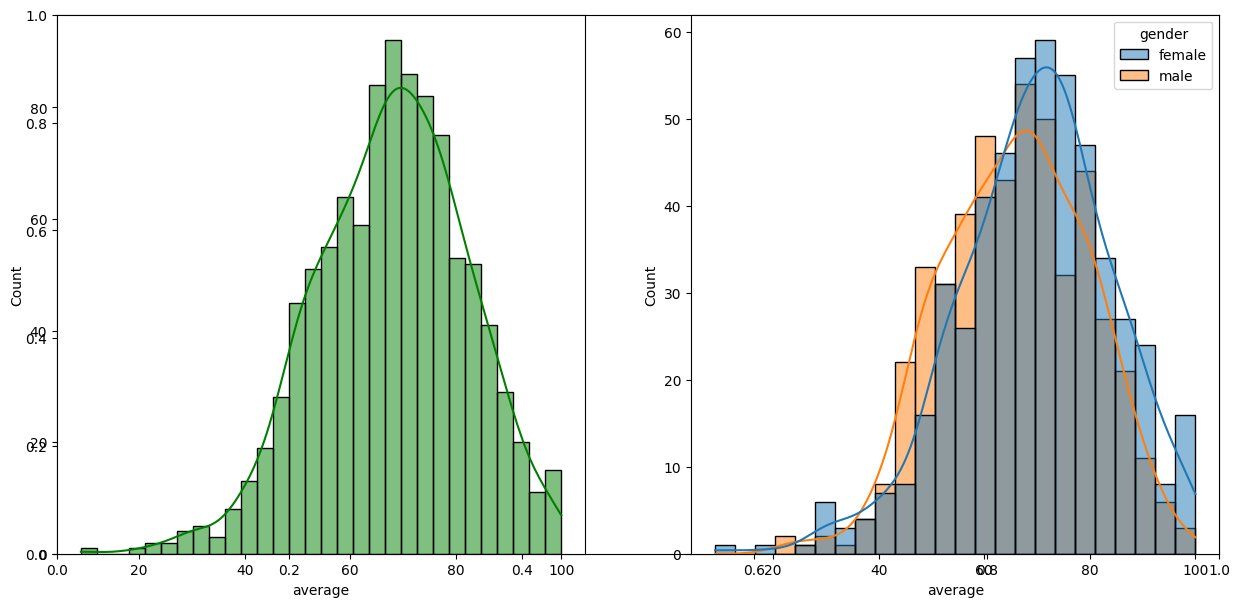

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()



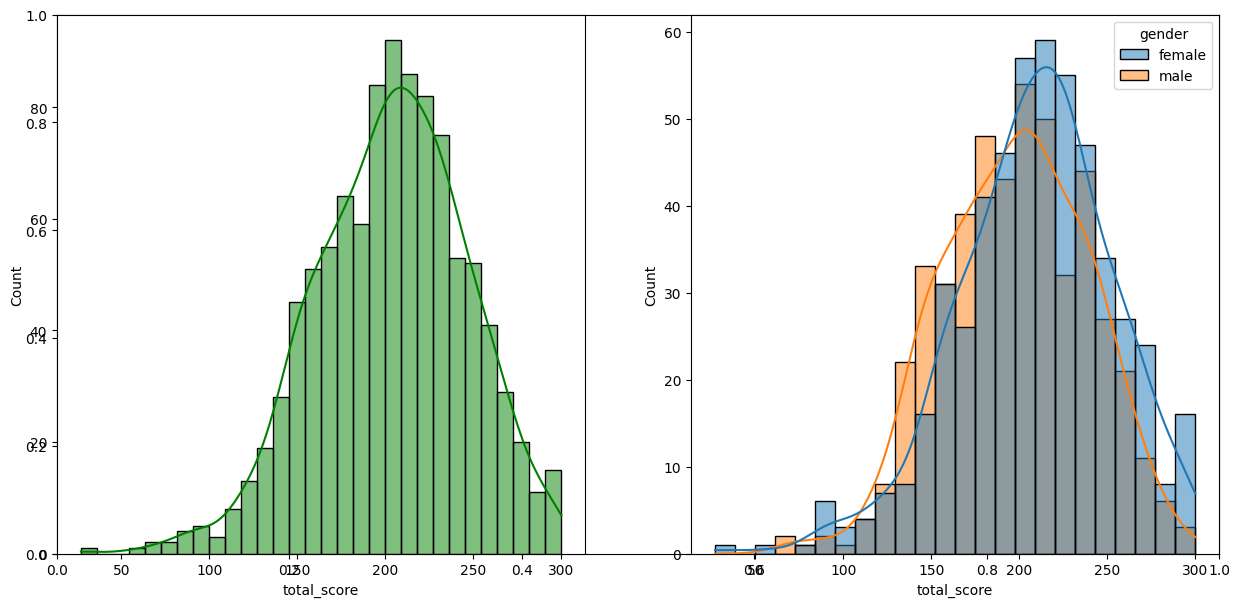

In [22]:
fig, axs = plt.subplots(1, 1, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()



As per observation female student are performed well in exam as compared to male student

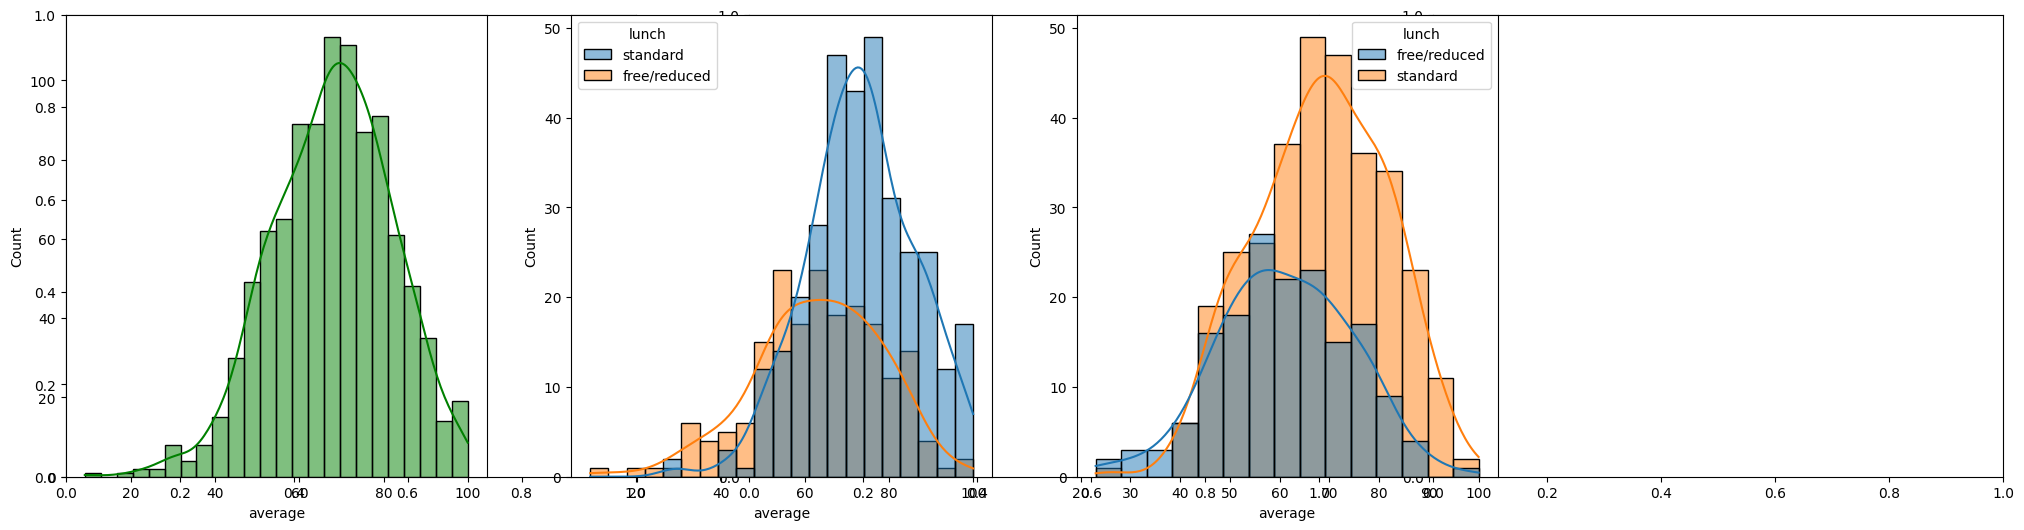

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,color='g')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

plt.show()

